In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

def exp_chirp(T=1024, f0=10, rate=2):
    t = torch.linspace(0, 1, T)
#     phi = 2 * np.pi * ((f0 * (np.exp(2 * t) - 1)) / rate)
    phi = 2 * np.pi * (f0 * (2 ** (rate * t) - 1)) / (rate * np.log(2))
    return torch.cos(phi)

def generate(f_c, f_m, chirp_rate=4, N=2**10):
    t = torch.linspace(0, 1, N)
    x_c = exp_chirp(T=T, rate=chirp_rate, f0=f_c) # carrier chirp
    x_m = torch.cos(2 * np.pi * f_m * t)
    x = x_c * x_m * torch.hann_window(N)
    return x

def plot(x):
    fig, axes = plt.subplots(2, 1, figsize=(8, 8))
    librosa.display.waveplot(x.numpy(), sr=T, ax=axes[0])
    axes[0].set_title("Waveplot of the signal")
    axes[1].specgram(x.numpy(), Fs=T)
    axes[1].set_title("Time-Frequency Spectrogram of the signal")
    fig.tight_layout()
    
def disp_audio(x, rate=2**10):
    return ipd.Audio(x, rate=rate, autoplay=True)

N = 2**10

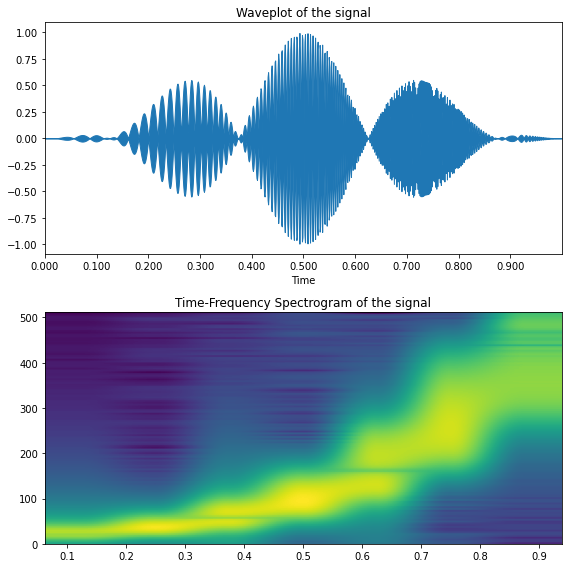

In [164]:
x = generate(f_c=12, f_m=2, chirp_rate=6, N=2**10)
plot(x)
disp_audio(X[750].numpy())

In [ ]:
np.linspace(10, 20, 10)

In [ ]:
import tqdm

f0s = np.linspace(10, 20, 10)
fms = np.linspace(0, 5, 10)
rates = np.linspace(2, 5, 10)

audio = torch.zeros(len(f0s), len(fms), len(rates), N)
cmap = torch.zeros(3, len(f0s) * len(fms) * len(rates))
c = 0
for i, f0 in tqdm.tqdm(enumerate(f0s)):
    for j, fm in enumerate(fcs):
        for k, r in enumerate(rates):
            audio[i, j, k] = generate(f0, fm, r)
            cmap[0, c], cmap[1, c], cmap[2, c] = f0, fm, r
            c += 1
            
X = audio.view(-1, N)

In [144]:
from kymatio.torch import TimeFrequencyScattering1D

jtfs = TimeFrequencyScattering1D(
    shape=(N, ),
    T=N,
    Q=12,
    J=8,
    max_pad_factor=1, 
    max_pad_factor_fr=1)
jtfs(X).shape

torch.Size([1200, 5759, 1])

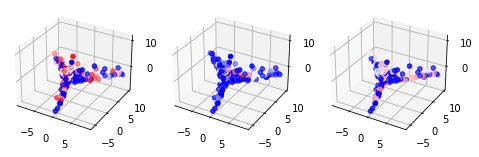

In [145]:
from sklearn.manifold import Isomap

embedding = Isomap(n_components=3, n_neighbors=40)
Y = embedding.fit_transform(X)

# f carrier
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter3D(Y[:, 0], Y[:, 1], Y[:, 2], c=cmap[0], cmap='bwr');

# f modulator
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter3D(Y[:, 0], Y[:, 1], Y[:, 2], c=cmap[1], cmap='bwr');

# chirp rate
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter3D(Y[:, 0], Y[:, 1], Y[:, 2], c=cmap[2], cmap='bwr');